In [ ]:
import sys
sys.path.append('/data_nfs/og86asub/SignifiKANTE_Results/')

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from signifikante.algo import grnboost2_fdr, grnboost2, diy, genie3
import numpy as np
import scanpy as sc
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import numpy as np


import pingouin
import itertools
import random


/data/bionets/og86asub/GRN-FinDeR/.pixi/envs/default/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:

from compute_networks import *

In [ ]:
net_collect = {}
p_net_collect = {}
groundtruth_collector = {}
for s in ['5_sources', '10_sources', '20_sources']:

    metrics_collector =  []

    os.makedirs(f'/data/bionets/og86asub/SignifiKANTE_Results/results/sc_simulated_data/{s}', exist_ok=True)
    net_collect[s] = []
    p_net_collect[s] = []
    groundtruth_collector[s] = []
    for i in range(1, 11):
        # Load expression matrix - in this case simulate one.
        groundtruth = pd.read_csv(f'/data/bionets/og86asub/SignifiKANTE_Results/data/sc_simulated_data/{s}/nets/network_{i}.tsv',  sep='\t')
        groundtruth_collector[s].append(groundtruth)
        tfs = list(groundtruth.source.unique())
        fdr_net = pd.read_csv(f'/data/bionets/og86asub/SignifiKANTE_Results/results/sc_simulated_data/{s}/grn_{i}.tsv', sep='\t')
        p_net_collect[s].append(fdr_net)
        metrics = compute_metrics(fdr_net, fdr_net, groundtruth, data_trial = f'data_{i}')
        metrics['data_configuration'] = s
        metrics_collector.append(metrics)

metrics_collector = pd.concat(metrics_collector)
metrics_collector.to_csv(f'/data/bionets/og86asub/SignifiKANTE_Results/results/sc_simulated_data/aggregated_metrics.tsv', sep = '\t', index=False)


[0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 18, 24, 61, 92, 123]
[0, 0, 1, 2, 3, 4, 4, 5, 6, 7, 8, 12, 16, 40, 60, 81]
[1, 2, 5, 8, 11, 13, 16, 19, 22, 24, 27, 41, 55, 138, 207, 276]
[0, 1, 3, 5, 6, 8, 10, 12, 13, 15, 17, 26, 34, 87, 130, 174]
[0, 1, 3, 5, 6, 8, 10, 11, 13, 15, 17, 25, 34, 85, 127, 170]
[1, 2, 4, 7, 9, 12, 14, 17, 19, 22, 24, 36, 49, 122, 183, 245]
[0, 0, 1, 2, 3, 3, 4, 5, 6, 6, 7, 11, 15, 38, 57, 76]
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 7, 10, 25, 37, 50]
[0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 29, 39, 97, 146, 195]
[1, 3, 6, 9, 12, 16, 19, 22, 25, 28, 32, 48, 64, 160, 240, 321]
[1, 2, 5, 8, 11, 13, 16, 19, 22, 25, 27, 41, 55, 139, 208, 278]
[2, 5, 10, 16, 21, 27, 32, 38, 43, 49, 54, 81, 109, 272, 408, 545]
[2, 4, 8, 12, 16, 20, 24, 29, 33, 37, 41, 62, 83, 208, 312, 416]
[1, 3, 7, 11, 15, 18, 22, 26, 30, 33, 37, 56, 75, 187, 281, 375]
[2, 5, 11, 17, 23, 29, 35, 41, 47, 53, 59, 89, 119, 297, 446, 595]
[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 251, 376, 502]
[2, 4, 9, 14,

<Axes: xlabel='importance'>

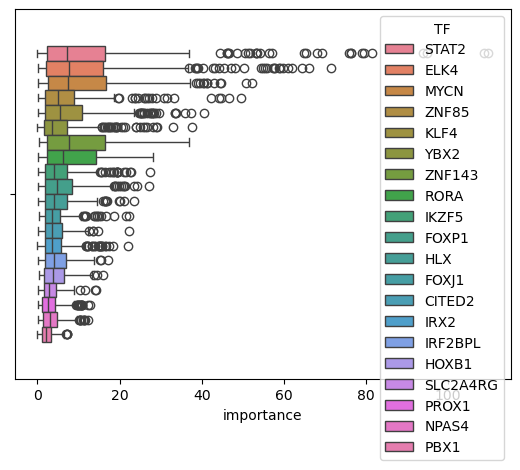

In [4]:
sns.boxplot(fdr_net, x='importance' , hue='TF')

<Axes: xlabel='pvalue'>

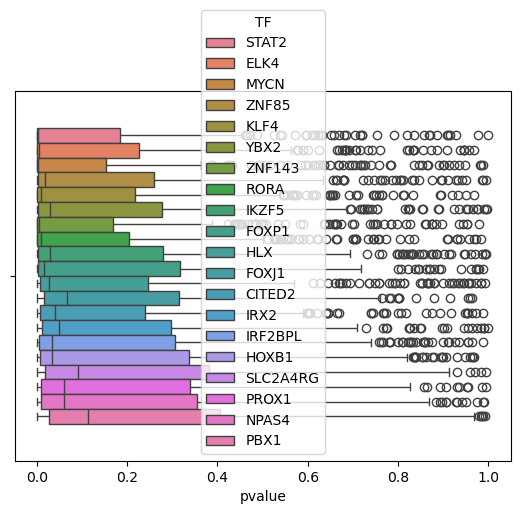

In [5]:
sns.boxplot(fdr_net, x='pvalue' , hue='TF')

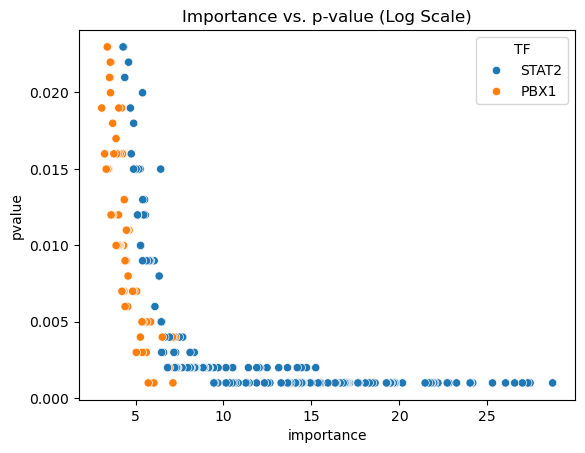

In [6]:

sns.scatterplot(
    data=fdr_net[ (fdr_net.p_adj<0.05) & (fdr_net.importance<30) & (fdr_net.TF.isin(['STAT2', 'PBX1'])) ],
    x='importance',
    y='pvalue',
    hue='TF'
)



# Optional: Set a title and show the plot
plt.title('Importance vs. p-value (Log Scale)')
plt.show()

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
label_fontsize = 20
# Assuming 'metrics_collector' is a list of DataFrames
metrics = pd.concat(metrics_collector)

# 1. Prepare the data: Create a combined hue column for differentiation
plot_data = metrics[(metrics['Top N Predictions'] <= 2000)].copy()
plot_data['combined_hue'] = plot_data['comparison'] 

# 2. Set up the figure and axes (standard matplotlib way)
fig, (ax , ax2, ax3)= plt.subplots(1,3,figsize=(18, 5) ) # Adjust figure size as needed

# 3. Draw the single lineplot
line_plot = sns.lineplot(
    data=plot_data[plot_data['data_configuration'].isin(['5_sources'])],
    x='thresholds',
    y='Precision',
    hue='combined_hue',  # Use the combined column for the legend
    ax=ax,
    palette=sns.color_palette("rocket", 4), # Need more colors now (4 lines)
    linewidth=2,

)

# 3. Draw the single lineplot
line_plot = sns.lineplot(
    data=plot_data[plot_data['data_configuration'].isin(['10_sources'])],
    x='thresholds',
    y='Precision',
    hue='combined_hue',  # Use the combined column for the legend
    ax=ax2,
    palette=sns.color_palette("rocket", 4), # Need more colors now (4 lines)
    linewidth=2,

)

# 3. Draw the single lineplot
line_plot = sns.lineplot(
    data=plot_data[plot_data['data_configuration'].isin(['10_sources'])],
    x='thresholds',
    y='Precision',
    hue='combined_hue',  # Use the combined column for the legend
    ax=ax3,
    palette=sns.color_palette("rocket", 4), # Need more colors now (4 lines)
    linewidth=2,

)


# 4. Apply axis and style settings
ax.set_xlabel('Top n edges', fontsize=label_fontsize)
ax.set_ylabel('Precision', fontsize=label_fontsize)

ax.tick_params(axis='x', labelsize=label_fontsize - 4)
ax.tick_params(axis='y', labelsize=label_fontsize - 4)

# Apply custom y-axis formatter (assuming FuncFormatter(format_ticks) is defined)
try:
        formatter = FuncFormatter(format_ticks)
        ax.yaxis.set_major_formatter(formatter)
except NameError:
        print("Warning: FuncFormatter(format_ticks) is not defined. Skipping y-axis formatter.")
        pass # Skip if not defined

ax.grid(True, alpha=0.8)
#ax.set_xscale('log')

# 5. Legend placement and styling
# Get the legend handle
legend = ax.legend(title='Filtering', loc='upper right')

# Apply legend styling
plt.setp(legend.get_texts(), fontsize=label_fontsize - 4)
plt.setp(legend.get_title(), fontsize=label_fontsize - 2)

# 6. Save the figure as PDF
plt.savefig('/data/bionets/og86asub/SignifiKANTE_Results/img/precision_synthetic.pdf', bbox_inches='tight')

# Note: 'ax' is the equivalent of 'axs['A']' from your original code.
plt.show() # Use this to display the plot if running in a script

NameError: name 'metrics_collector' is not defined

In [ ]:
plt.savefig('/data/bionets/og86asub/SignifiKANTE_Results/img/precision_synthetic.pdf')

<Axes: xlabel='thresholds', ylabel='jaccard_index'>

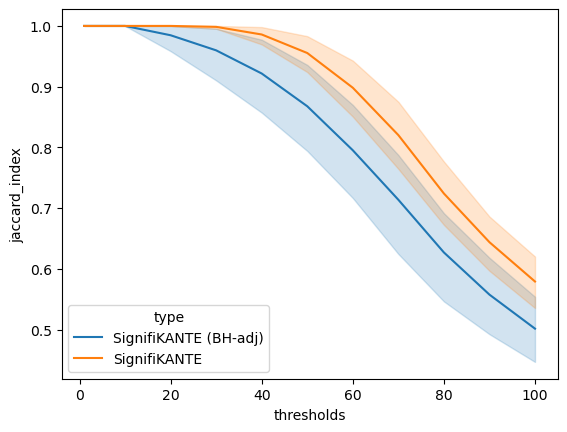

In [ ]:
sns.lineplot(myjac, x = 'thresholds', y='jaccard_index', hue = 'type')

In [ ]:
p_net_collect['5_sources'][2][p_net_collect['5_sources'][2].p_adj<0.05]

,Unnamed: 0,TF,target,importance,count,shuffled_occurences,pvalue,p_adj,edge_keys
0,5,L3MBTL1,SOX9,64.937,0.000,1000,0.001,0.008,L3MBTL1_SOX9
1,13,L3MBTL1,PCK2,57.435,0.000,1000,0.001,0.008,L3MBTL1_PCK2
2,29,SF1,MC2R,56.895,0.000,1000,0.001,0.008,SF1_MC2R
3,1,L3MBTL1,SF1,55.331,0.000,1000,0.001,0.008,L3MBTL1_SF1
4,0,ARNT2,CYP1A1,42.536,0.000,1000,0.001,0.008,ARNT2_CYP1A1
5,13,SF1,SOX9,40.660,0.000,1000,0.001,0.008,SF1_SOX9
6,12,L3MBTL1,MC2R,40.189,0.000,1000,0.001,0.008,L3MBTL1_MC2R
7,11,L3MBTL1,HSD3B2,40.014,0.000,1000,0.001,0.008,L3MBTL1_HSD3B2
8,17,SF1,SULT2A1,39.741,0.000,1000,0.001,0.008,SF1_SULT2A1
9,9,L3MBTL1,TGFB3,37.909,0.000,1000,0.001,0.008,L3MBTL1_TGFB3
